In [18]:
import pandas as pd
import numpy as np

data = pd.read_csv('/Users/bhushan/Desktop/venv/Chennai Water Quality 02/Data/output.csv')
X = data.drop(columns=['DBU Class'])  
y = data['DBU Class']

In [19]:
from scipy.stats import entropy

class_counts = data['DBU Class'].value_counts()
total_instances = len(data)
class_probabilities = class_counts / total_instances

entropy_value = entropy(class_probabilities, base=2)
print("Entropy:", entropy_value)

Entropy: 1.6686253639492463


In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

target_variable = 'DBU Class'
X = data.drop(columns=[target_variable])
y = data[target_variable]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Decision Tree Accuracy:", accuracy)

Decision Tree Accuracy: 0.9344729344729344


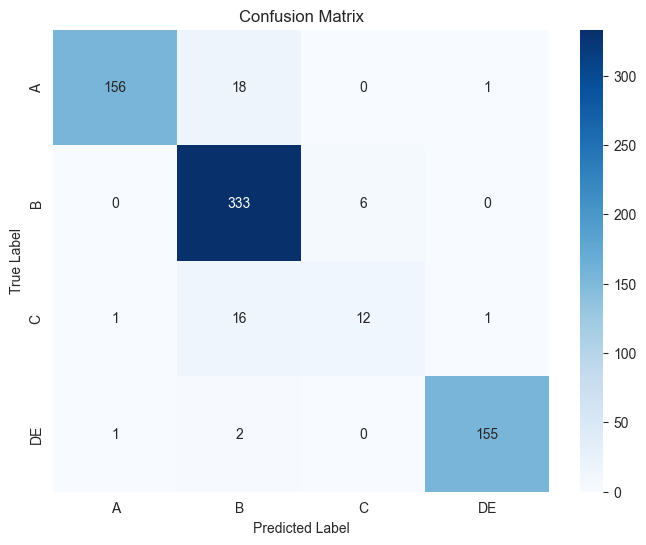

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

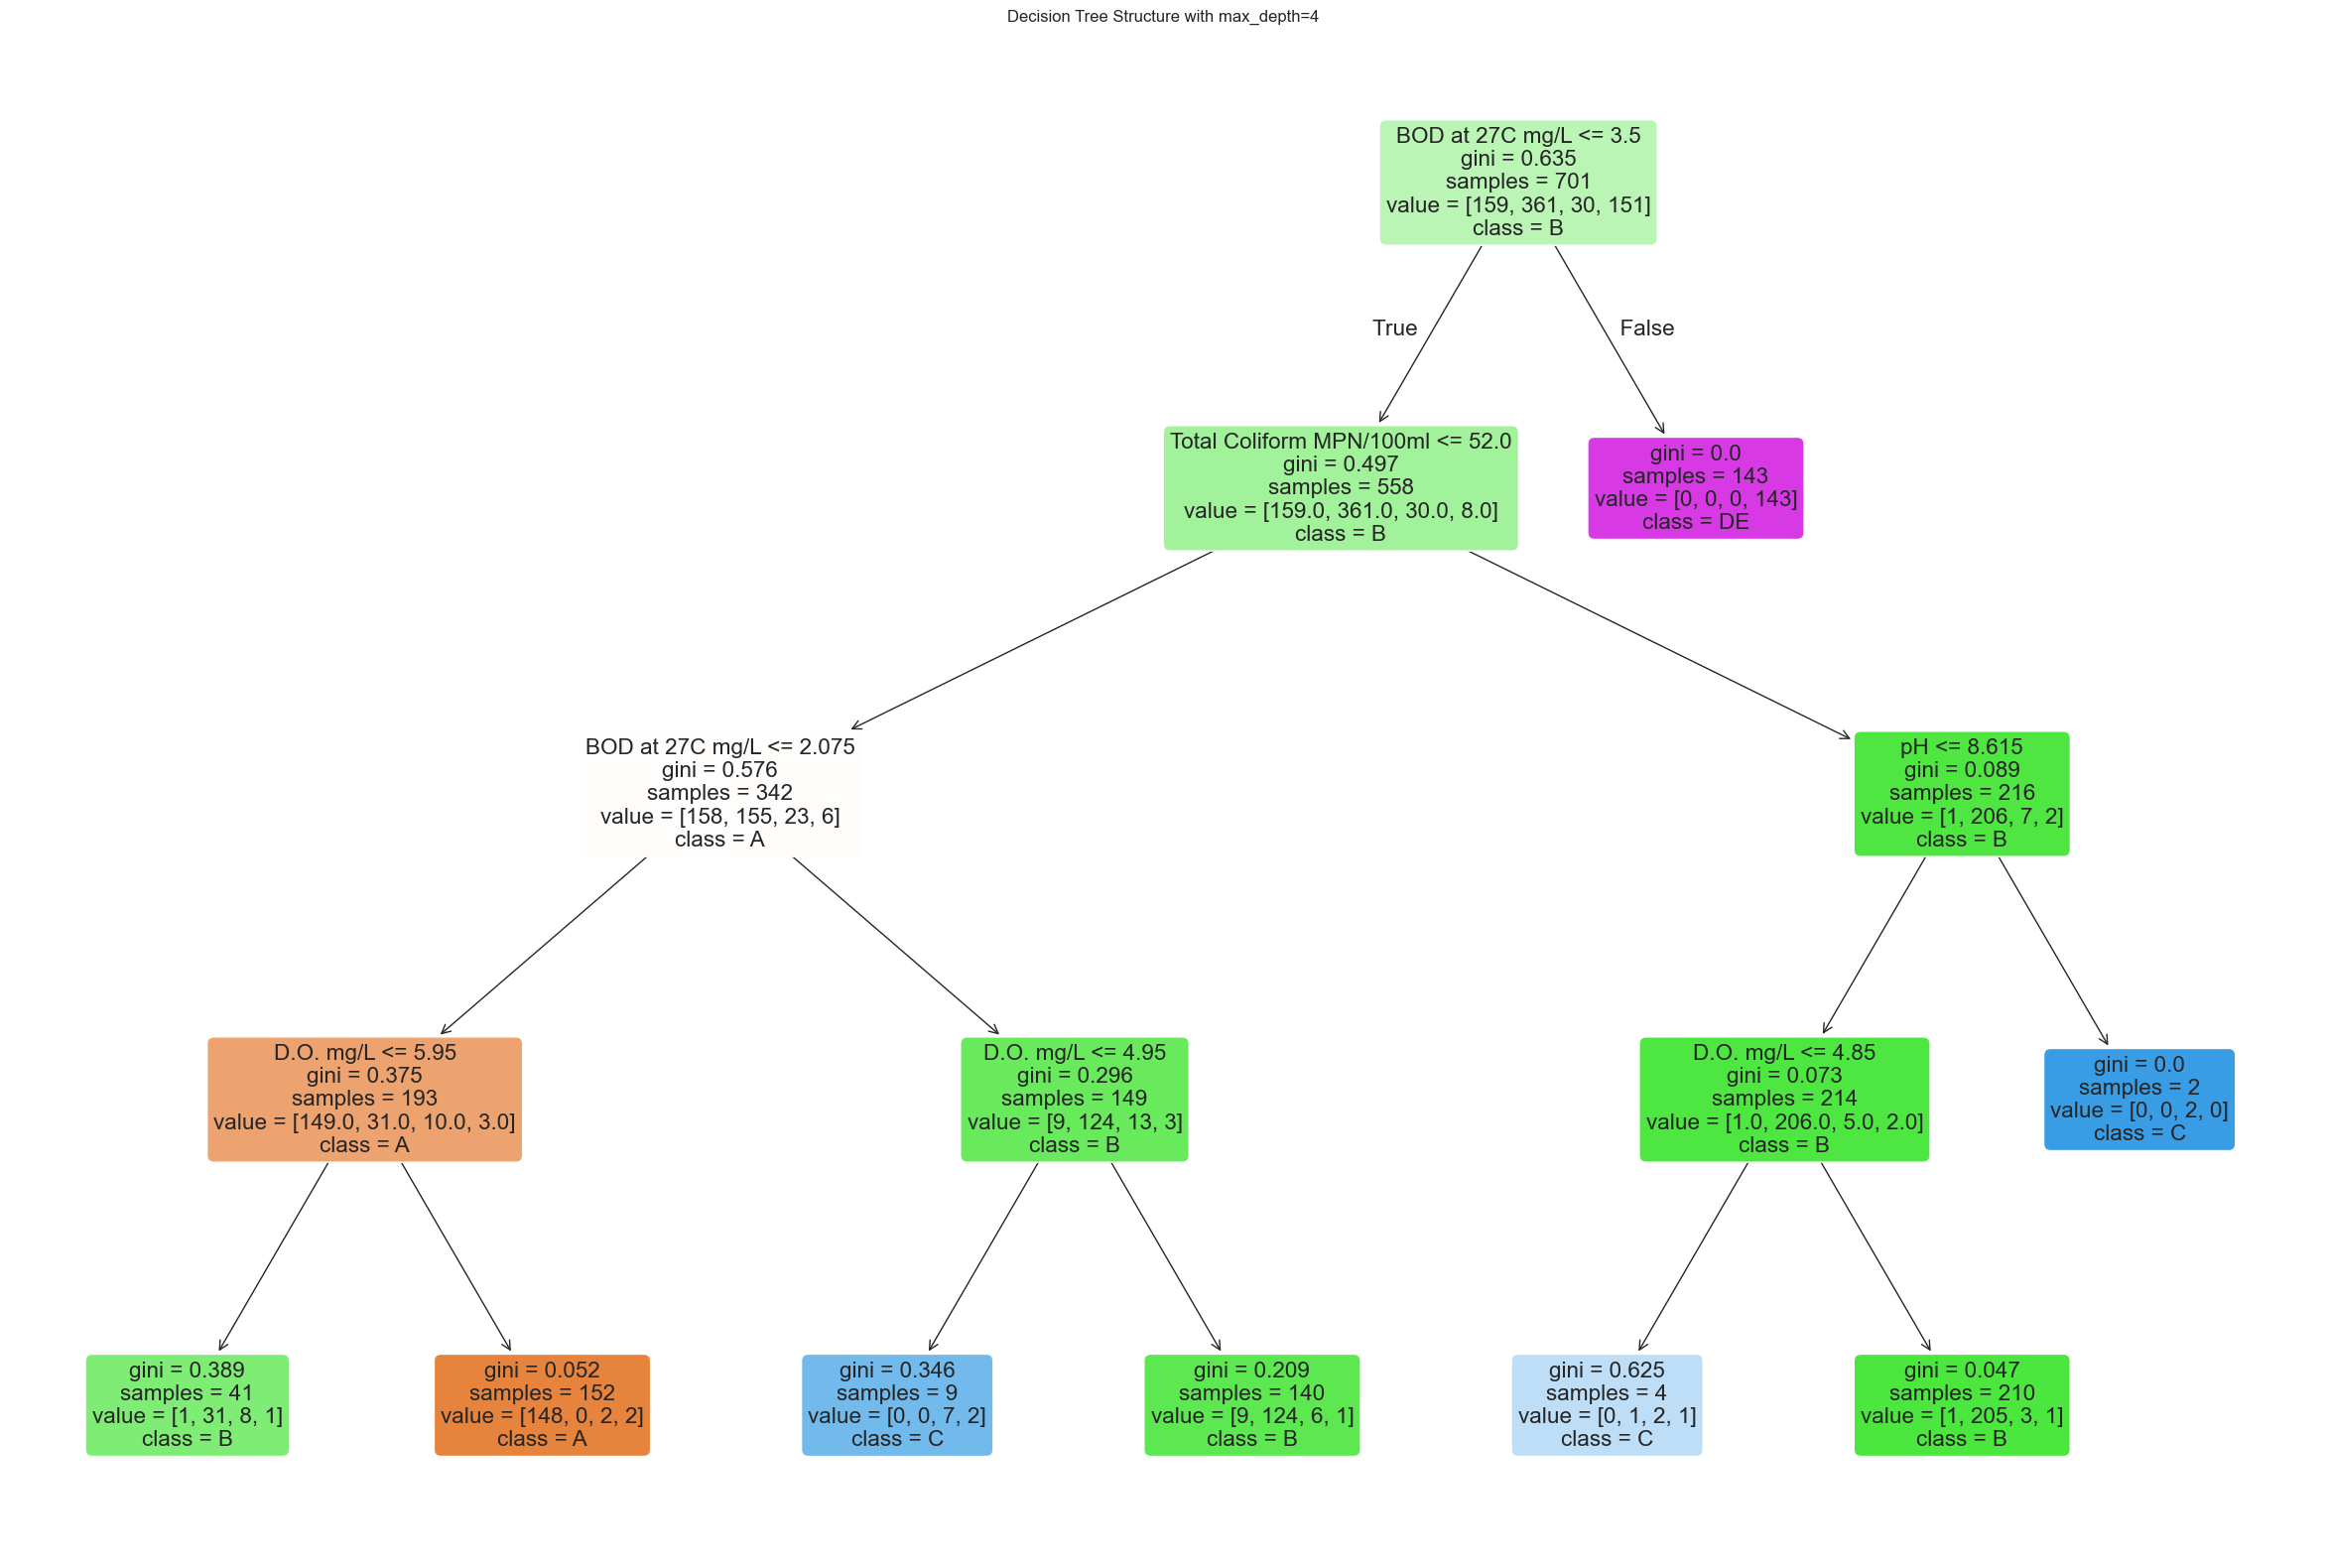

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 20))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
plt.title("Decision Tree Structure with max_depth=4")
plt.show()